<a href="https://colab.research.google.com/github/Dbf2021/Customer-sales-analysis-/blob/main/Copy_of_my_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_1samp
from scipy.stats import t

In [ ]:
from google.colab import files
upload  = files.upload()

Saving laptop data.csv to laptop data.csv


In [ ]:
df = pd.read_csv('/content/laptop data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


In [ ]:
# Convert the 'Inches' column to floats
df['Inches'] = pd.to_numeric(df['Inches'], errors='coerce')
df['Inches'].head()


,Inches
0,13.3
1,13.3
2,15.6
3,15.4
4,13.3


In [ ]:
df.isna().sum()

,0
Unnamed: 0,30
Company,30
TypeName,30
Inches,31
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30
OpSys,30


In [ ]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [ ]:
df.shape

(1303, 12)

In [ ]:
df.index

RangeIndex(start=0, stop=1303, step=1)

In [ ]:
#using KNN imputer for numerical columns to impute missing values
from sklearn.impute import KNNImputer
impute = KNNImputer()

#impute missing values for numerical columns
for i in df.select_dtypes(include="number").columns:
  df[i] = impute.fit_transform(df[[i]])

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Company,30
TypeName,30
Inches,0
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30
OpSys,30


In [ ]:
# Fill all columns with the most frequent value (mode) for each column
df.fillna(df.mode().iloc[0], inplace=True)


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


In [ ]:
#check duplicate rows in the dataset
df.duplicated().sum()
#remove duplicate rows
df.drop_duplicates(inplace=True)
#verify after removing duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
for i in df.select_dtypes(include='object').columns:
  print(df[i].value_counts())

Company
Lenovo       291
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
LG             3
Google         3
Huawei         2
Fujitsu        2
Name: count, dtype: int64
TypeName
Notebook              711
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: count, dtype: int64
ScreenResolution
Full HD 1920x1080                                496
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4

In [ ]:
#standardize company column
df['Company'] = df['Company'].str.title()
#verify the standardization and check the unique values
print(df['Company'].unique())

['Apple' 'Hp' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'Msi' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'Lg']


In [ ]:
#capitalizing the first letter
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.title()

# Let's check the first few rows to verify the standardization
df.head()


,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,Ips Panel Retina Display 2560X1600,Intel Core I5 2.3Ghz,8Gb,128Gb Ssd,Intel Iris Plus Graphics 640,Macos,1.37Kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440X900,Intel Core I5 1.8Ghz,8Gb,128Gb Flash Storage,Intel Hd Graphics 6000,Macos,1.34Kg,47895.5232
2,2.0,Hp,Notebook,15.6,Full Hd 1920X1080,Intel Core I5 7200U 2.5Ghz,8Gb,256Gb Ssd,Intel Hd Graphics 620,No Os,1.86Kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,Ips Panel Retina Display 2880X1800,Intel Core I7 2.7Ghz,16Gb,512Gb Ssd,Amd Radeon Pro 455,Macos,1.83Kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,Ips Panel Retina Display 2560X1600,Intel Core I5 3.1Ghz,8Gb,256Gb Ssd,Intel Iris Plus Graphics 650,Macos,1.37Kg,96095.8080


In [ ]:
#get rows with outliers only.
from scipy.stats import zscore
#calculate the zscore for numerical columns
z_scores = np.abs(zscore(df.select_dtypes(include='number')))
#set a threshold for zscores
outliers_zscore = (z_scores > 3)
columns_with_outliers = df.select_dtypes(include='number').columns[(outliers_zscore.any(axis=0))]
outliers_columns_zscore = df[columns_with_outliers][outliers_zscore.any(axis=1)]
outliers_columns_zscore

,Inches,Price
196,17.3,324954.720
238,17.3,207259.200
402,25.6,60978.960
408,35.6,21791.520
423,35.6,31808.160
424,27.3,149130.720
438,24.0,126912.960
458,33.5,95850.720
525,24.0,71395.200
592,31.6,32127.840


In [ ]:
# Loop through object columns
for col in df.select_dtypes(include='object').columns:
    # Convert categories to numeric counts (frequency encoding)
    df[f'{col}_encoded'] = df[col].map(df[col].value_counts())

    # Calculate Z-scores on the encoded numeric values
    z_scores = stats.zscore(df[f'{col}_encoded'])

    # Identify rows with Z-scores > 3 or < -3 as outliers
    outliers = df[(z_scores > 3) | (z_scores < -3)]

    print(f"Outliers detected in '{col}': {len(outliers)} rows")
    print(outliers[[col]])
    print("-" * 30)

# Drop the temporary encoded columns afterward
df.drop([f"{col}_encoded" for col in df.select_dtypes(include='object').columns], axis=1, inplace=True)


Outliers detected in 'Company': 0 rows
Empty DataFrame
Columns: [Company]
Index: []
------------------------------
Outliers detected in 'TypeName': 0 rows
Empty DataFrame
Columns: [TypeName]
Index: []
------------------------------
Outliers detected in 'ScreenResolution': 0 rows
Empty DataFrame
Columns: [ScreenResolution]
Index: []
------------------------------
Outliers detected in 'Cpu': 0 rows
Empty DataFrame
Columns: [Cpu]
Index: []
------------------------------
Outliers detected in 'Ram': 0 rows
Empty DataFrame
Columns: [Ram]
Index: []
------------------------------
Outliers detected in 'Memory': 0 rows
Empty DataFrame
Columns: [Memory]
Index: []
------------------------------
Outliers detected in 'Gpu': 0 rows
Empty DataFrame
Columns: [Gpu]
Index: []
------------------------------
Outliers detected in 'OpSys': 0 rows
Empty DataFrame
Columns: [OpSys]
Index: []
------------------------------
Outliers detected in 'Weight': 0 rows
Empty DataFrame
Columns: [Weight]
Index: []
--------

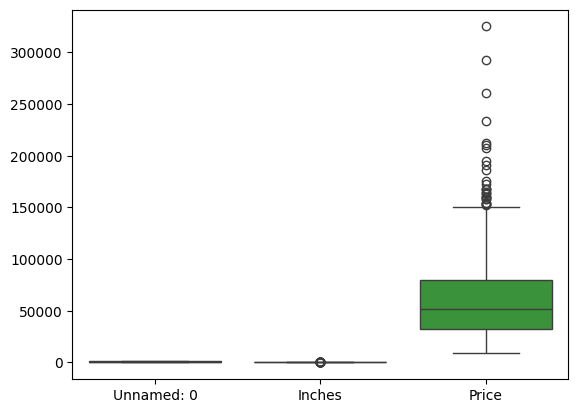

In [ ]:
#create boxplots for each numerical column to visualize outliers
sns.boxplot(data=df.select_dtypes(include='number'))
plt.show()

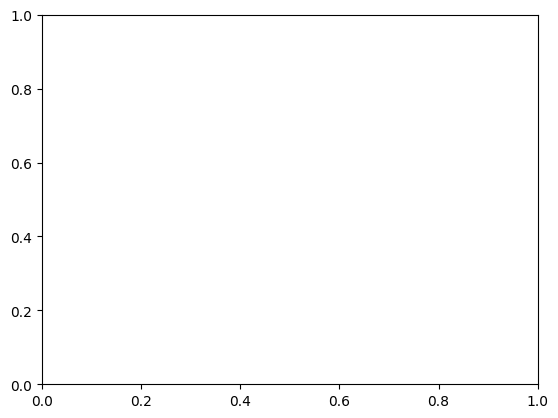

In [ ]:
#create boxplots for each numerical column to visualize outliers
sns.boxplot(data=df.select_dtypes(include='object'))
plt.show()

In [ ]:
df.describe()

,Unnamed: 0,Inches,Price
count,1274.000000,1274.000000,1274.000000
mean,652.674784,15.130818,59955.814073
std,376.345122,1.952900,37317.585024
min,0.000000,10.100000,9270.720000
25%,327.250000,14.000000,31914.720000
50%,652.337392,15.600000,52161.120000
75%,979.750000,15.600000,79303.816800
max,1302.000000,35.600000,324954.720000


In [ ]:
print("Mean:", df['Price'].mean())
print("Median:", df['Price'].median())
print("Mode:", df['Company'].mode()[0])

Mean: 59955.814073212874
Median: 52161.12
Mode: Lenovo


In [ ]:
print("Variance:", df['Price'].var())
print("Standard Deviation:", df['Price'].std())

Variance: 1392602152.0555847
Standard Deviation: 37317.5850244303


In [ ]:
# Group by 'Company' and calculate mean, median, and mode for 'Price'
brand_stats = df.groupby('Company')['Price'].agg(['mean', 'median', lambda x: x.mode()[0]])

# Rename the mode column for clarity
brand_stats.columns = ['Mean Price', 'Median Price', 'Mode Price']

print(brand_stats.sort_values('Mean Price', ascending=False))


              Mean Price  Median Price   Mode Price
Company                                            
Razer      178282.491429   154458.7200   54825.1200
Lg         111834.720000   111834.7200  101178.7200
Msi         91814.548891    85194.7200   63882.7200
Google      89386.080000    83063.5200   67932.0000
Microsoft   85903.788000    83622.9600   52693.9200
Apple       83340.499886    71378.6832   47895.5232
Huawei      75870.720000    75870.7200   71874.7200
Samsung     75308.320000    87858.7200   90522.7200
Toshiba     66747.370213    64468.8000   63669.6000
Dell        63237.061079    52480.8000   58554.7200
Xiaomi      60390.882000    58578.6960   49816.8000
Asus        58972.373723    53946.0000   19660.3200
Lenovo      58078.949156    47898.7200   79866.7200
Hp          57214.371465    51495.1200   37242.7200
Fujitsu     38574.720000    38574.7200   34578.7200
Acer        33394.615969    29783.5200   15397.9200
Chuwi       16745.726400    13261.3920   13053.0672
Mediacom    

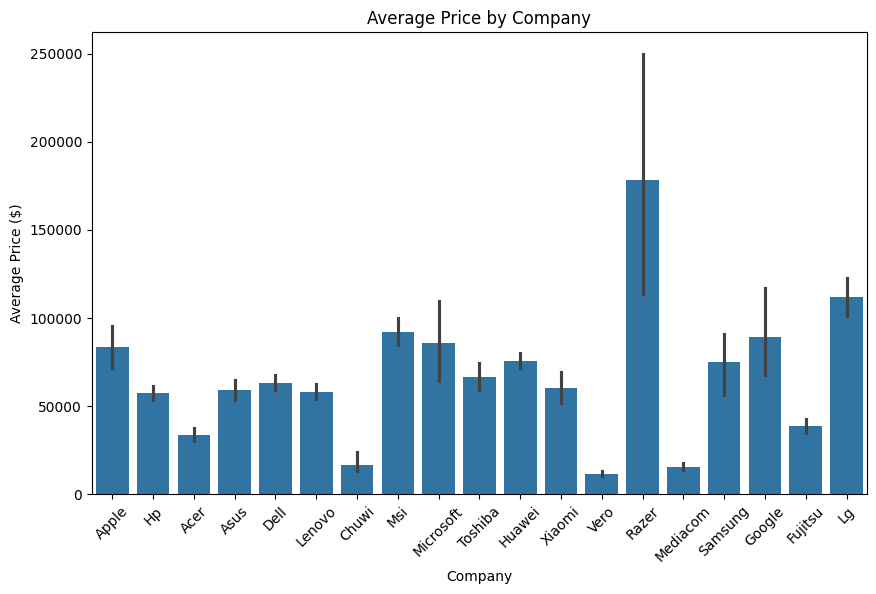

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Company', y='Price', data=df, estimator=np.mean)
plt.title('Average Price by Company')
plt.xticks(rotation=45)
plt.ylabel('Average Price ($)')
plt.show()


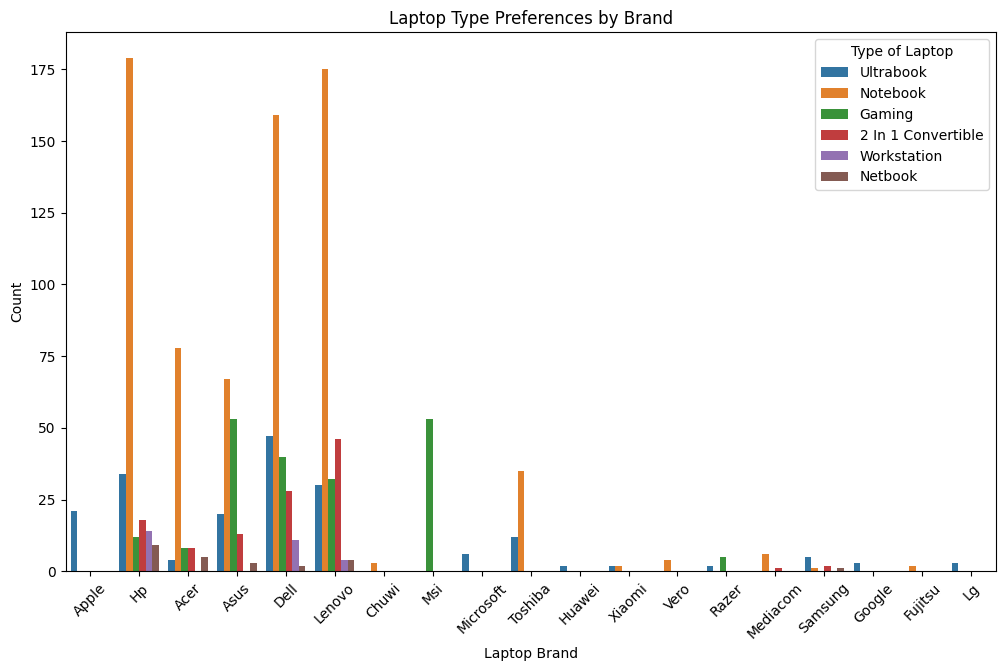

In [ ]:
plt.figure(figsize=(12, 7))
sns.countplot(x='Company', hue='TypeName', data=df)
plt.title('Laptop Type Preferences by Brand')
plt.xlabel('Laptop Brand')
plt.ylabel('Count')
plt.legend(title='Type of Laptop', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.show()


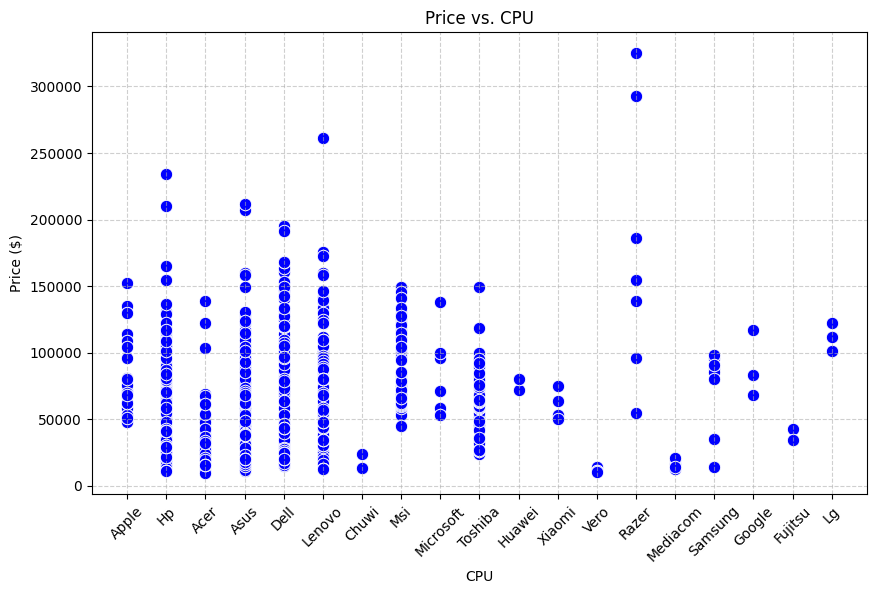

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Company', y='Price', data=df, color='blue', s=80)

plt.title('Price vs. CPU')
plt.xticks(rotation=45)
plt.xlabel('CPU')
plt.ylabel('Price ($)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


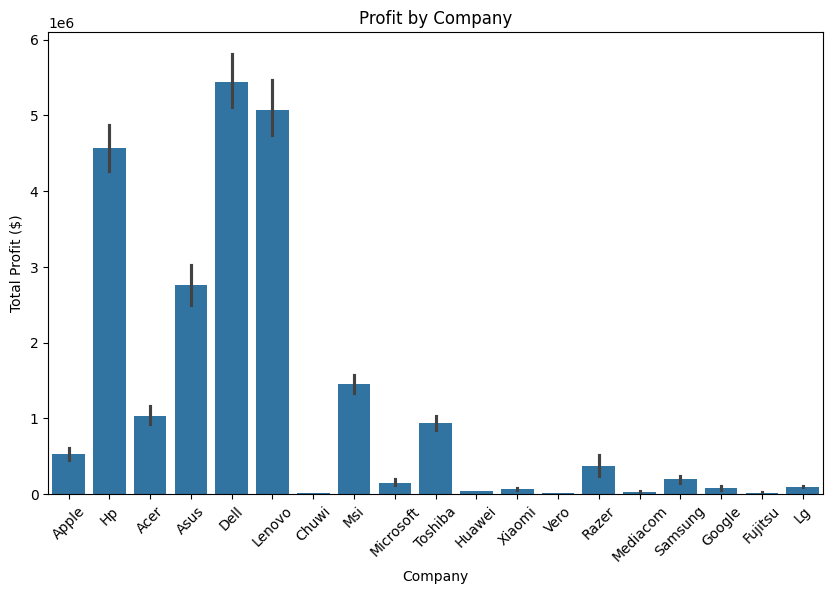

In [ ]:
# Assume Cost per Unit is 70% of Price
df['Cost per Unit'] = df['Price'] * 0.7
df['Total Cost'] = df['Cost per Unit']
df['Profit'] = df['Price'] - df['Total Cost']

# Visualize profits by Company
plt.figure(figsize=(10, 6))
sns.barplot(x='Company', y='Profit', data=df, estimator=sum)
plt.title('Profit by Company')
plt.xlabel('Company')
plt.ylabel('Total Profit ($)')
plt.xticks(rotation=45)
plt.show()


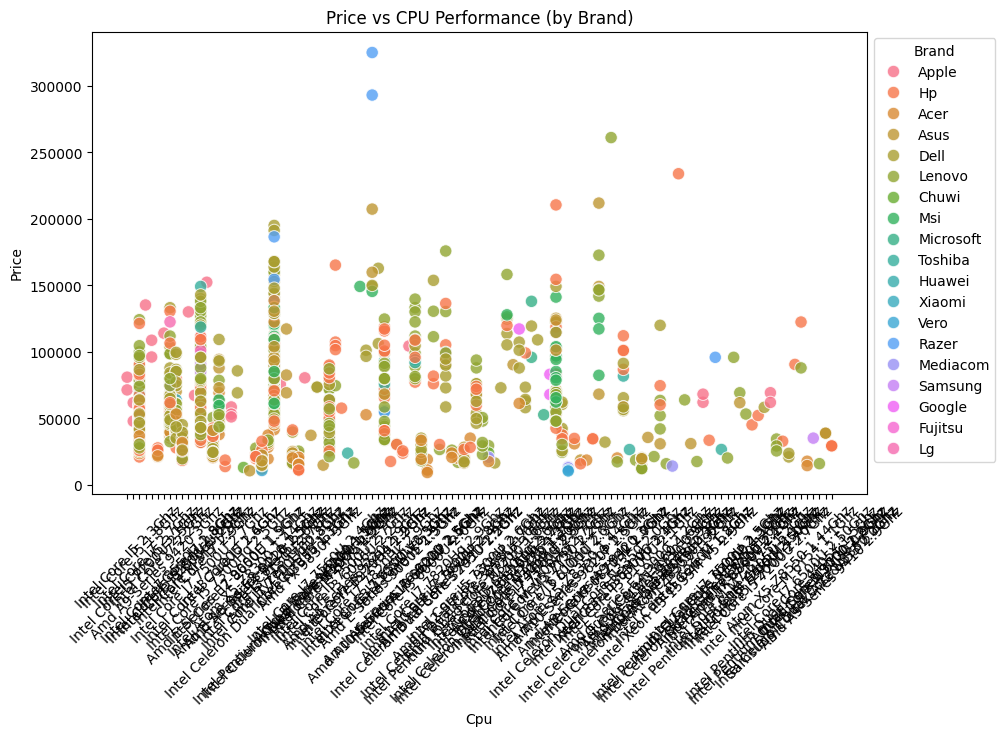

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Cpu',
    y='Price',
    data=df,
    hue='Company',
    alpha=0.8,
    s=80
)
plt.title('Price vs CPU Performance (by Brand)')
plt.xticks(rotation=45)
plt.legend(title="Brand", bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr(numeric_only=True)

print(correlation_matrix)


            Unnamed: 0    Inches     Price
Unnamed: 0    1.000000 -0.093057  0.065403
Inches       -0.093057  1.000000  0.044622
Price         0.065403  0.044622  1.000000


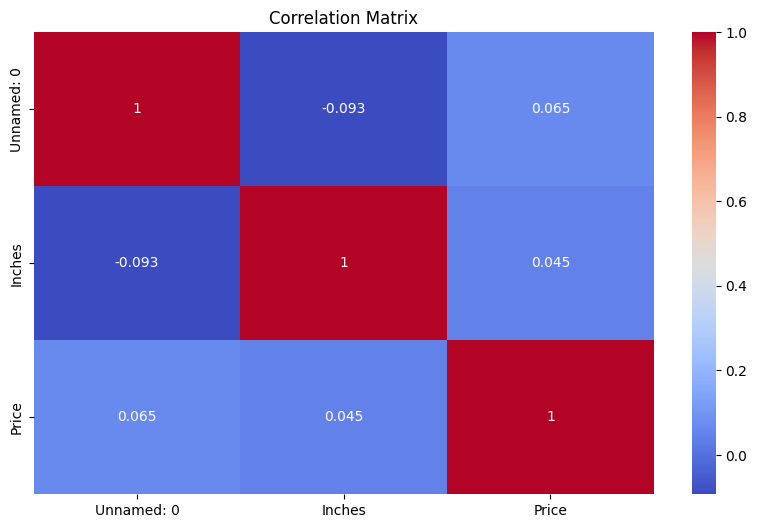

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Extract two columns for correlation
price = df['Price']
ram = df['Ram']

# Calculate the correlation coefficient
correlation_coefficient = price.corr(ram)

# Output the result
print(f"Correlation coefficient between Price and RAM: {correlation_coefficient:.2f}")


Correlation coefficient between Price and RAM: -0.28


In [ ]:
# Extract 'Price' column
laptop_prices = df['Price']

# Calculate descriptive statistics
sample_mean = np.mean(laptop_prices)
sample_std = np.std(laptop_prices, ddof=1)
sample_size = len(laptop_prices)

# Set confidence level
confidence_level = 0.95

# Calculate the critical value (t-distribution)
t_critical = t.ppf((1 + confidence_level) / 2, df=sample_size - 1)

# Calculate margin of error
margin_error = t_critical * (sample_std / np.sqrt(sample_size))

# Calculate the confidence interval
lower_bound = sample_mean - margin_error
upper_bound = sample_mean + margin_error

# Output the results
print(f"Sample Mean: ${sample_mean:.2f}")
print(f"95% Confidence Interval: (${lower_bound:.2f}, ${upper_bound:.2f})")


Sample Mean: $59955.81
95% Confidence Interval: ($57926.90, $61984.73)


In [ ]:

# Extract the columns from your dataset
laptop_price = df['Price']
laptop_weight = df['Weight']

# Set the hypothesized population means
hypothesized_mean_price = 1000
hypothesized_mean_weight = 2

# Perform one-sample t-tests
t_stat_price, p_value_price = ttest_1samp(laptop_price, hypothesized_mean_price)
t_stat_weight, p_value_weight = ttest_1samp(laptop_weight, hypothesized_mean_weight)

# Define significance level
alpha = 0.05

# Output the results for Price
print("\n--- Hypothesis Test for Laptop Price ---")
print(f"Hypothesized Mean: {hypothesized_mean_price}")
print(f"Sample Mean for Laptop Price: {np.mean(laptop_price):.2f}")
print(f"T-statistic: {t_stat_price:.4f}")
print(f"P-value: {p_value_price:.4f}")

if p_value_price < alpha:
    print("Reject the null hypothesis: The mean 'Price' is significantly different from $1000.")
else:
    print("Fail to reject the null hypothesis: No significant difference from $1000.")

# Output the results for Weight
print("\n--- Hypothesis Test for Laptop Weight ---")
print(f"Hypothesized Mean: {hypothesized_mean_weight} kg")
print(f"Sample Mean for Laptop Weight: {np.mean(laptop_weight):.2f} kg")
print(f"T-statistic: {t_stat_weight:.4f}")
print(f"P-value: {p_value_weight:.4f}")

if p_value_weight < alpha:
    print("Reject the null hypothesis: The mean 'Weight' is significantly different from 2 kg.")
else:
    print("Fail to reject the null hypothesis: No significant difference from 2 kg.")



--- Hypothesis Test for Laptop Price ---
Hypothesized Mean: 1000
Sample Mean for Laptop Price: 59955.81
T-statistic: 56.3894
P-value: 0.0000
Reject the null hypothesis: The mean 'Price' is significantly different from $1000.

--- Hypothesis Test for Laptop Weight ---
Hypothesized Mean: 2 kg
Sample Mean for Laptop Weight: 92.75 kg
T-statistic: 73.4700
P-value: 0.0000
Reject the null hypothesis: The mean 'Weight' is significantly different from 2 kg.


In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create a contingency table with two categorical columns from the laptop dataset
contingency_table = pd.crosstab(df['Company'], df['TypeName'])

# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display the results
print("Contingency Table:")
print(contingency_table)

print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

print(f"\nChi-Square Statistic: {chi2_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")

# Decision based on the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: 'Company' and 'TypeName' are NOT independent.")
else:
    print("Fail to reject the null hypothesis: 'Company' and 'TypeName' are independent.")


Contingency Table:
TypeName   0   1  2    3   4   5
Company                         
0          8   8  5   78   4   0
1          0   0  0    0  21   0
2         13  53  3   67  20   0
3          0   0  0    3   0   0
4         28  40  2  159  47  11
5          0   0  0    2   0   0
6          0   0  0    0   3   0
7         18  12  9  179  34  14
8          0   0  0    0   2   0
9         46  32  4  175  30   4
10         0   0  0    0   3   0
11         1   0  0    6   0   0
12         0   0  0    0   6   0
13         0  53  0    0   0   0
14         0   5  0    0   2   0
15         2   0  1    1   5   0
16         0   0  0   35  12   0
17         0   0  0    4   0   0
18         0   0  0    2   2   0

Expected Frequencies:
TypeName          0          1         2           3          4         5
Company                                                                  
0          9.378336  16.412088  1.940345   57.482732  15.441915  2.344584
1          1.912088   3.346154  0.395604   

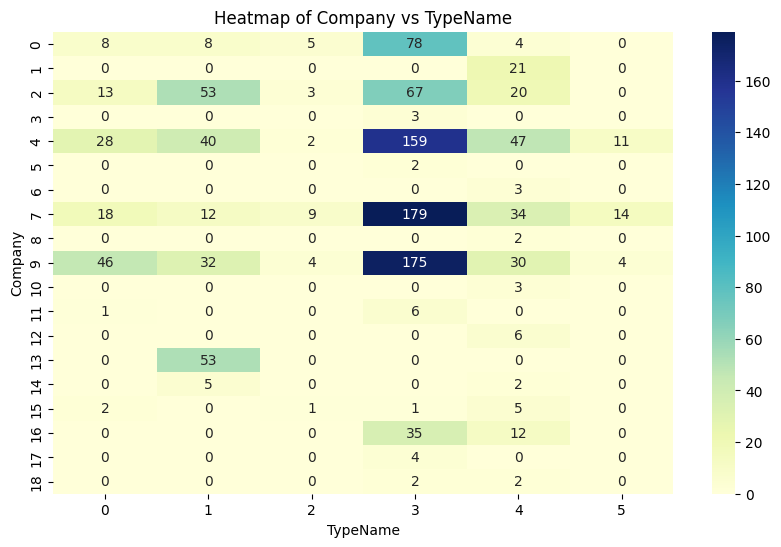

In [ ]:
# Create a heatmap to visualize the contingency table
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")

plt.title("Heatmap of Company vs TypeName")
plt.xlabel("TypeName")
plt.ylabel("Company")
plt.show()


**interpretation**

Dell and Lenovo are leading in total profit, closely followed by Apple. These brands seem to dominate the premium

*Dell* and *Lenovo* generate high profit while  Brands like *Huawei Xiaomi, sumsung, and Google* show minimal profits

Budget brands (Acer, Lenovo): Prioritize moderate performance, maximizing affordability.

Weight e.g Ultrabooks cost more, showing customers value portability. Brands could offer lightweight models with mid-tier performance to balance cost and demand.

